In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [113]:
import pandas as pd

data_path = "data/merged.csv"

df = pd.read_csv(data_path)

In [114]:
df

,VYP batch,Part,Set Time,FFTE Feed solids SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,...,TFE Out flow PV,TFE Product out temperature,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,batch
0,102_2019_07_02,0,2/07/2019 0:10,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,...,1942.93,0,64.92,1.13,125.03,64.79,44.61,70,-80.20,0
1,104_2019_07_02,0,2/07/2019 1:39,50.0,41.09,118.44,2186.05,67.0,-79.82,125.0,...,1872.24,0,66.80,1.22,124.71,64.79,44.46,69,-80.56,0
2,102_2019_07_02,0,2/07/2019 2:39,50.0,41.09,125.00,2186.05,67.0,-79.82,125.0,...,2288.59,0,60.65,1.22,125.03,61.97,43.91,68,-80.20,0
3,104_2019_07_02,0,2/07/2019 3:07,50.0,41.09,125.00,2186.05,67.0,-79.72,125.0,...,1365.76,0,65.21,1.22,125.03,61.97,42.05,70,-80.20,0
4,108_2019_07_02,1,2/07/2019 19:05,50.0,39.00,90.00,2335.90,65.0,-80.00,120.0,...,692.61,0,-14.53,1.09,119.91,70.75,13.80,71,-71.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26140,100_2020_06_25,1,26/06/2020 3:06,25.0,42.00,125.00,2035.71,72.0,-79.89,130.0,...,3763.29,0,71.59,1.25,129.83,66.52,49.36,73,-77.74,2
26141,100_2020_06_25,1,26/06/2020 3:17,25.0,42.00,125.00,2035.71,72.0,-79.44,130.0,...,3083.66,0,72.10,1.25,129.83,63.89,85.66,73,-79.49,2
26142,100_2020_06_25,1,26/06/2020 3:22,25.0,42.00,125.00,2035.71,72.0,-73.05,130.0,...,1046.04,0,74.42,1.25,130.16,64.44,88.67,74,-77.39,2
26143,100_2020_06_25,1,26/06/2020 3:27,25.0,42.00,125.00,2035.71,72.0,-60.58,130.0,...,2411.15,0,75.65,1.25,130.16,67.26,90.59,76,-68.93,2


# Data Preprocessing

In [115]:
# Irrelevant columns
df.drop(["VYP batch", "Set Time"], axis=1, inplace=True)

## Converting columns that has less than 10 unique values 

In [116]:
columns_to_be_converted = []
for col in df.columns:
    unique_values = len(df[col].unique())
    print(f"{col} Has unique values: {unique_values}")
    if unique_values > 1 and unique_values < 10 and col != "batch":
        columns_to_be_converted.append(col)

Part Has unique values: 3
FFTE Feed solids SP Has unique values: 7
FFTE Production solids SP Has unique values: 19
FFTE Steam pressure SP Has unique values: 2545
TFE Out flow SP Has unique values: 178
TFE Production solids SP Has unique values: 118
TFE Vacuum pressure SP Has unique values: 4427
TFE Steam pressure SP Has unique values: 95
Extract tank Level Has unique values: 5983
FFTE Discharge density Has unique values: 49
FFTE Discharge solids Has unique values: 1423
FFTE Feed flow rate PV Has unique values: 455
FFTE Feed solids PV Has unique values: 1137
FFTE Heat temperature 1 Has unique values: 1755
FFTE Heat temperature 2 Has unique values: 1356
FFTE Heat temperature 3 Has unique values: 1685
FFTE Production solids PV Has unique values: 1822
FFTE Steam pressure PV Has unique values: 1629
TFE Input flow PV Has unique values: 552
TFE Level Has unique values: 1605
TFE Motor current Has unique values: 1171
TFE Motor speed Has unique values: 6
TFE Out flow PV Has unique values: 1059
T

## Drop column with constant value

In [117]:
df.drop(["TFE Product out temperature"], axis=1, inplace=True)

## Distribution of unique values on columns less than 10 unique values

Part
1    11245
2     9379
0     5521
Name: count, dtype: int64


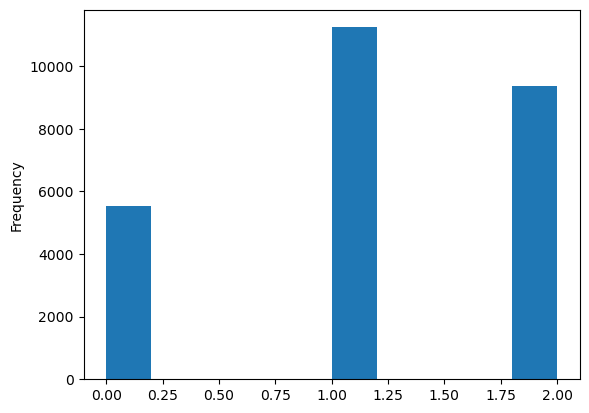

FFTE Feed solids SP
50.00    23749
25.00     2343
42.80       25
38.63       21
48.86        4
38.08        2
45.00        1
Name: count, dtype: int64


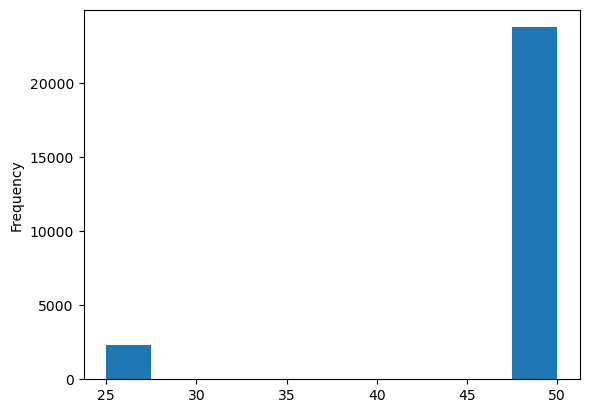

TFE Motor speed
80    25665
68      216
0       159
20       96
60        6
77        3
Name: count, dtype: int64


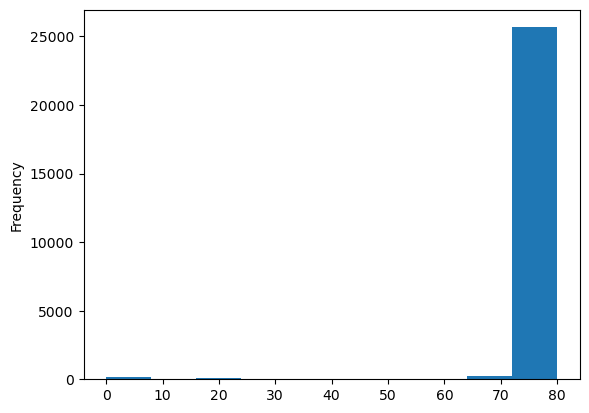

In [118]:
for col in columns_to_be_converted:
    print(df[col].value_counts())
    df[col].plot.hist()
    plt.show()

### Removing values that has less than 10 occurances

In [119]:
for col in columns_to_be_converted:
    value_counts = df[col].value_counts()
    values_to_remove = value_counts[value_counts < 10].index
    df = df[~df[col].isin(values_to_remove)]

## Converting to categorical

In [120]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in columns_to_be_converted:
    df[col] = le.fit_transform(df[col])

In [121]:
df

,Part,FFTE Feed solids SP,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,Extract tank Level,FFTE Discharge density,...,TFE Motor speed,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV,batch
0,0,3,41.09,118.44,2186.05,67.0,-79.82,125.0,46.38,1.27,...,3,1942.93,64.92,1.13,125.03,64.79,44.61,70,-80.20,0
1,0,3,41.09,118.44,2186.05,67.0,-79.82,125.0,31.73,1.28,...,3,1872.24,66.80,1.22,124.71,64.79,44.46,69,-80.56,0
2,0,3,41.09,125.00,2186.05,67.0,-79.82,125.0,26.08,1.28,...,3,2288.59,60.65,1.22,125.03,61.97,43.91,68,-80.20,0
3,0,3,41.09,125.00,2186.05,67.0,-79.72,125.0,19.70,1.28,...,3,1365.76,65.21,1.22,125.03,61.97,42.05,70,-80.20,0
4,1,3,39.00,90.00,2335.90,65.0,-80.00,120.0,47.41,1.53,...,3,692.61,-14.53,1.09,119.91,70.75,13.80,71,-71.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26140,1,0,42.00,125.00,2035.71,72.0,-79.89,130.0,1.72,1.28,...,3,3763.29,71.59,1.25,129.83,66.52,49.36,73,-77.74,2
26141,1,0,42.00,125.00,2035.71,72.0,-79.44,130.0,1.63,1.28,...,3,3083.66,72.10,1.25,129.83,63.89,85.66,73,-79.49,2
26142,1,0,42.00,125.00,2035.71,72.0,-73.05,130.0,1.75,1.28,...,3,1046.04,74.42,1.25,130.16,64.44,88.67,74,-77.39,2
26143,1,0,42.00,125.00,2035.71,72.0,-60.58,130.0,1.84,1.28,...,3,2411.15,75.65,1.25,130.16,67.26,90.59,76,-68.93,2


## Distribution of target variable

In [122]:
df.value_counts

<bound method DataFrame.value_counts of        Part  FFTE Feed solids SP  FFTE Production solids SP  \
0         0                    3                      41.09   
1         0                    3                      41.09   
2         0                    3                      41.09   
3         0                    3                      41.09   
4         1                    3                      39.00   
...     ...                  ...                        ...   
26140     1                    0                      42.00   
26141     1                    0                      42.00   
26142     1                    0                      42.00   
26143     1                    0                      42.00   
26144     1                    0                      42.00   

       FFTE Steam pressure SP  TFE Out flow SP  TFE Production solids SP  \
0                      118.44          2186.05                      67.0   
1                      118.44          2186.05     

In [123]:
y = df.pop("batch")

<Axes: ylabel='Frequency'>

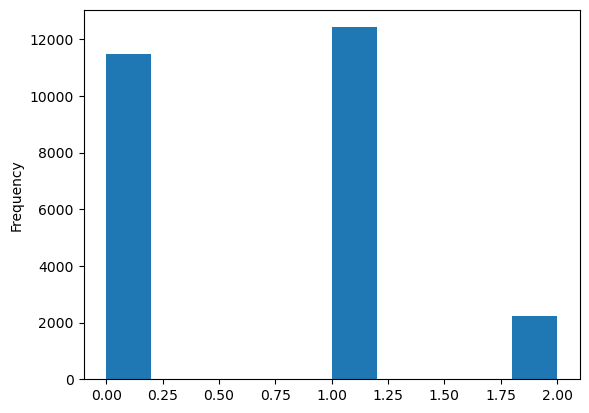

In [124]:
y.plot.hist()

In [125]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
df, y= sm.fit_resample(df, y)

## Data Normalization

In [126]:
categorical_columns = ["Part", "FFTE Feed solids SP", "TFE Motor speed"]

In [127]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

tmp = scaler.fit_transform(df.drop(categorical_columns, axis=1))
tmp = pd.DataFrame(tmp, columns=df.columns[~df.columns.isin(categorical_columns)])
df = pd.concat([df[categorical_columns], tmp], axis=1)

In [128]:
df

,Part,FFTE Feed solids SP,TFE Motor speed,FFTE Production solids SP,FFTE Steam pressure SP,TFE Out flow SP,TFE Production solids SP,TFE Vacuum pressure SP,TFE Steam pressure SP,Extract tank Level,...,TFE Level,TFE Motor current,TFE Out flow PV,TFE Production solids PV,TFE Production solids density,TFE Steam pressure PV,TFE Steam temperature,TFE Tank level,TFE Temperature,TFE Vacuum pressure PV
0,0,3,3,0.5225,0.129095,0.464068,0.683673,0.170000,0.924812,0.610912,...,0.469568,0.429862,0.108665,0.774108,0.741176,0.740085,0.663404,0.390195,0.333333,0.115178
1,0,3,3,0.5225,0.129095,0.464068,0.683673,0.170000,0.924812,0.415968,...,0.463947,0.403407,0.104711,0.785736,0.847059,0.738191,0.663404,0.388423,0.314815,0.111381
2,0,3,3,0.5225,0.136905,0.464068,0.683673,0.170000,0.924812,0.340785,...,0.463947,0.377339,0.127997,0.747696,0.847059,0.740085,0.610316,0.381926,0.296296,0.115178
3,0,3,3,0.5225,0.136905,0.464068,0.683673,0.171852,0.924812,0.255888,...,0.425179,0.403923,0.076385,0.775902,0.847059,0.740085,0.610316,0.359953,0.333333,0.115178
4,1,3,3,0.0000,0.095238,0.537575,0.663265,0.166667,0.887218,0.624617,...,0.126769,0.310492,0.038737,0.282675,0.694118,0.709779,0.775602,0.026226,0.351852,0.204303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37252,2,3,3,1.0000,0.142857,0.636780,0.782225,0.479001,0.887218,0.647106,...,0.437294,0.368177,0.152044,0.847405,0.905882,0.709779,0.752824,0.796338,0.500000,0.297226
37253,2,3,3,1.0000,0.147900,0.764775,0.702523,0.275828,0.887218,0.363059,...,0.454098,0.376742,0.138351,0.780377,0.894118,0.710068,0.695307,0.796482,0.407407,0.193490
37254,0,3,3,0.8675,0.145343,0.571299,0.696457,0.674565,0.887218,0.873261,...,0.465873,0.394682,0.110738,0.796114,0.864772,0.708963,0.854925,0.505478,0.537037,0.404078
37255,1,0,0,0.6687,0.166737,0.592400,0.168969,0.722222,0.863169,0.030499,...,0.479289,0.123463,0.421245,0.349598,0.456415,0.004660,0.223618,0.824479,0.129630,0.986053


In [129]:
df.columns

Index(['Part', 'FFTE Feed solids SP', 'TFE Motor speed',
       'FFTE Production solids SP', 'FFTE Steam pressure SP',
       'TFE Out flow SP', 'TFE Production solids SP', 'TFE Vacuum pressure SP',
       'TFE Steam pressure SP', 'Extract tank Level', 'FFTE Discharge density',
       'FFTE Discharge solids', 'FFTE Feed flow rate PV',
       'FFTE Feed solids PV', 'FFTE Heat temperature 1',
       'FFTE Heat temperature 2', 'FFTE Heat temperature 3',
       'FFTE Production solids PV', 'FFTE Steam pressure PV',
       'TFE Input flow PV', 'TFE Level', 'TFE Motor current',
       'TFE Out flow PV', 'TFE Production solids PV',
       'TFE Production solids density', 'TFE Steam pressure PV',
       'TFE Steam temperature', 'TFE Tank level', 'TFE Temperature',
       'TFE Vacuum pressure PV'],
      dtype='object')

<Axes: ylabel='Frequency'>

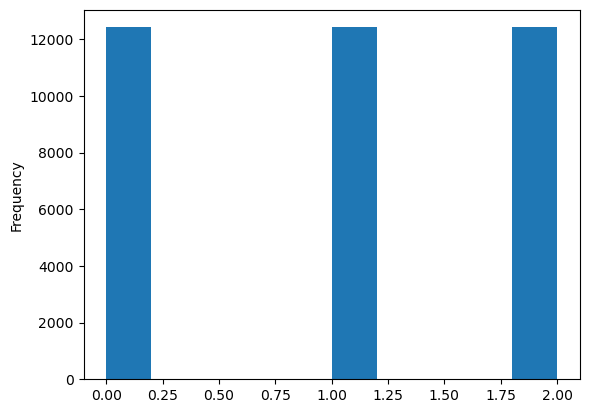

In [130]:
y.plot.hist()

In [131]:
df["batch"] = y
df.to_csv("data/preprocessed.csv", index=False)